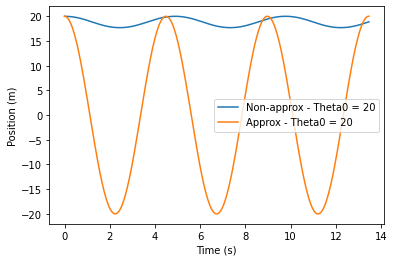

In [ ]:
#   Hunter Barndt
#   Dr. Wackerbauer
#   PHYS 341: Classical Mechanics
#   Due: 9/10/21

# Discussion:
# I know this is wrong and it should show them overlapping for a good while but then get progressively farther apart but I couldn't get it to work for some reason.

import numpy as np
import matplotlib.pyplot as plt
#---------------------------
def omegadot(theta):
    return -goverR*np.sin(theta)
#---------------------------
def approxomegadot(theta):
    return -goverR*theta
#---------------------------
def euler_improved_pendulum(time,theta0,omega0,appliedF,dt):
    #theta0 is theta(time=0), initial condition
    #dt is the time step
    #initialize an array for the output
    theta = []
    omega = []

    for n in range(0,len(time)):
        theta.append(theta0)
        omega.append(omega0)

        omegas = omega0 + appliedF(theta0)*dt   # Full time step
        thetas = theta0 + omega0*dt

        omegap = omega0 + 0.5*(appliedF(theta0) + appliedF(thetas))*dt # Full time step advance, using average F^n, F^n+1
        theta0 = theta0 + 0.5*(omegas+omega0)*dt
        omega0 = omegap

    return theta

goverR = 9.8/5 #per 1/sec^2 or rad/sec^2
period = 2*np.pi*np.sqrt(1/goverR)
theta0 = 20
omega0 = 0
dt = 0.01
time = np.arange(0, 3*period + dt, dt)
theta1 = euler_improved_pendulum(time,theta0,omega0,omegadot,dt)
theta2 = euler_improved_pendulum(time,theta0,omega0,approxomegadot,dt)

#Plots the Position vs Time
plt.figure(1)
plt.plot(time,theta1, label='Non-approx - Theta0 = 20')
plt.plot(time,theta2, label='Approx - Theta0 = 20')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()
